In [6]:
import elevation
import os
import geopandas as gpd
import regionmask
import rasterio
import rioxarray

%matplotlib inline

In [7]:
#Skagit bounds bounding_box = (-122.6,47.5,-120,49.5)

In [20]:
dir =  os.path.split(os.getcwd())[0]
file_path = dir + '/data/GIS/SkagitRiver_90mDEM.tif'

The line below will download and save a tif file in file_path

In [21]:
elevation.clip(bounds=(-122.6,47.5,-120,49.5), output = file_path)

make: Nothing to be done for `download'.
make: Nothing to be done for `all'.
cp SRTM1.vrt SRTM1.fbec98a471c14b028dd4a6e5616a08a0.vrt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin -122.6 49.5 -120.0 47.5 SRTM1.fbec98a471c14b028dd4a6e5616a08a0.vrt /Users/jesse/projects/skagit-met/data/GIS/SkagitRiver_90mDEM.tif
rm -f SRTM1.fbec98a471c14b028dd4a6e5616a08a0.vrt


In [22]:
boundary_path = '../data/GIS/SkagitBoundary.json'
sf = gpd.read_file(str(boundary_path))

In [23]:
#sf.explore()

In [24]:
sf

,OBJECTID,AREA,PERIMETER,SKAGIT_,SKAGIT_ID,GRID_CODE,Shape_Leng,Shape_Area,geometry
0,1,8.060220e+09,948300.0,2,1,1,948300.0,8.060220e+09,"POLYGON ((-120.81726 49.26101, -120.8152 49.26..."


In [25]:
# read in the DEM 

dem = rioxarray.open_rasterio(
    file_path,
    masked=True,
)

In [26]:
#crop DEM 
poly = sf.geometry


In [27]:
skagit_dem = dem.rio.clip(poly)

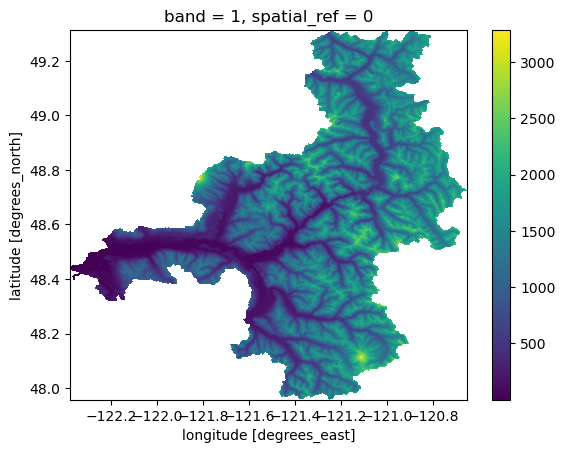

In [28]:
skagit_dem.plot()